In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_ip,train_op),(test_ip,test_op) = tf.keras.datasets.mnist.load_data()

In [3]:
train_ip[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

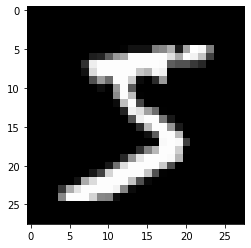

In [4]:
plt.imshow(train_ip[0],cmap="gray")

In [5]:
train_ip = (train_ip - 127.5)/127.5
train_ip.shape

(60000, 28, 28)

In [6]:
train_ip[0]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

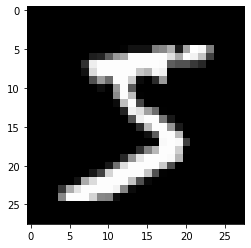

In [7]:
plt.imshow(train_ip[0],cmap="gray")

In [8]:
train_ip.shape

(60000, 28, 28)

In [9]:
train_ip = train_ip.reshape(train_ip.shape[0],28,28,1)

In [10]:
train_ip.shape

(60000, 28, 28, 1)

In [11]:
BUFFER_SIZE = train_ip.shape[0]
Batch_size = 200
train_ip = tf.data.Dataset.from_tensor_slices(train_ip).shuffle(BUFFER_SIZE).batch(Batch_size)

In [12]:
def make_generator():
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(7*7*256,input_shape=(100,),use_bias=False),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.LeakyReLU(0.2),
            tf.keras.layers.Reshape((7,7,256)),
            
            tf.keras.layers.Conv2DTranspose(128,(3,3),padding="same",use_bias=False),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
        
            tf.keras.layers.Conv2DTranspose(64,(3,3),padding="same",strides=(2,2),use_bias = False),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            
            tf.keras.layers.Conv2DTranspose(1,(3,3),padding="same",strides=(2,2),activation="tanh")
            
    ])
    model.summary()
    return model

In [13]:
def make_dicriminator():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(126,(3,3),padding="same",activation=tf.keras.layers.LeakyReLU(0.2),input_shape=(28,28,1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(256,(3,3),padding="same",activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(32,activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    model.summary()
    return model

In [14]:
from tensorflow.keras.losses import BinaryCrossentropy
bce = BinaryCrossentropy(from_logits=True)

In [15]:
def disc_loss(real_op,fake_op):
    real_loss = bce(tf.ones_like(real_op),real_op)
    fake_loss = bce(tf.zeros_like(fake_op),fake_op)
    return real_loss + fake_loss

In [16]:
def generator_loss(fake_loss):
    loss = bce(tf.ones_like(fake_loss),fake_loss)
    return loss

In [17]:
desc = make_generator()
op = desc(np.random.randn(1,100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         294912    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
re_lu (ReLU)                 (None, 7, 7, 128)         0

In [18]:
op.shape

TensorShape([1, 28, 28, 1])

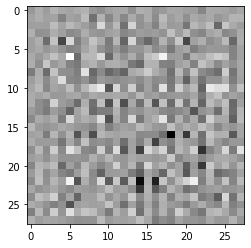

In [19]:
plt.imshow(op[0,:,:,0],cmap="gray")

In [20]:
desc = make_dicriminator()
desc(np.random.randn(1,28,28,1))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 126)       1260      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 126)       504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 126)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       290560    
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3211328   
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

<tf.Tensor: id=921, shape=(1, 1), dtype=float32, numpy=array([[-0.09831133]], dtype=float32)>

In [21]:
optimizer = tf.keras.optimizers.Adam()

In [22]:
desc_opt = tf.keras.optimizers.Adam()

In [23]:
generator = make_generator()
descriminator = make_dicriminator()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_4 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 7, 7, 128)         294912    
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 7, 7, 128)        

In [24]:
def train_step(images,epochs):
    fake_im = np.random.randn(Batch_size,100).astype("float32")
    with tf.GradientTape() as desc_tape, tf.GradientTape() as gen_tape:
        generated_image = generator(fake_im)
        
        real_op = descriminator(images)
        fake_op = descriminator(generated_image)
        
        gen_loss = generator_loss(fake_op)
        desc_los = disc_loss(real_op,fake_op)
        
        gradients_of_gen = gen_tape.gradient(gen_loss,generator.trainable_variables)
        gradients_of_desc = desc_tape.gradient(desc_los,descriminator.trainable_variables)
        
        optimizer.apply_gradients(zip(gradients_of_desc,descriminator.trainable_variables))
        desc_opt.apply_gradients(zip(gradients_of_gen,generator.trainable_variables))
        print("gen loss",gen_loss.numpy())
        print("desc loss",desc_los.numpy())
        print("===============>",epochs)

In [25]:
def train(dataset,epochs):
    for epoch in range(epochs):
        for image in dataset:
            image = tf.cast(image,tf.dtypes.float32)
            train_step(image,epoch)

In [26]:
train(train_ip,3)

gen loss 0.69225526
desc loss 1.3580186
===============> 0
gen loss 0.53889775
desc loss 0.87861073
===============> 0
gen loss 0.49798924
desc loss 0.93971837
===============> 0
gen loss 0.5571637
desc loss 0.8635931
===============> 0
gen loss 0.6625382
desc loss 0.74812454
===============> 0
gen loss 0.6836702
desc loss 0.71185297
===============> 0
gen loss 0.6961215
desc loss 0.69330144
===============> 0
gen loss 0.6117943
desc loss 0.782975
===============> 0
gen loss 0.7085261
desc loss 0.67998874
===============> 0
gen loss 0.71690106
desc loss 0.675114
===============> 0
gen loss 0.7426968
desc loss 0.65279615
===============> 0
gen loss 0.8003237
desc loss 0.6024475
===============> 0
gen loss 0.8909245
desc loss 0.53067327
===============> 0
gen loss 0.9816703
desc loss 0.47027922
===============> 0
gen loss 1.1716706
desc loss 0.37264994
===============> 0
gen loss 1.3646878
desc loss 0.299648
===============> 0
gen loss 1.6620206
desc loss 0.21755384
===============> 0
ge

gen loss 3.6723523
desc loss 0.314309
===============> 0
gen loss 4.076261
desc loss 0.244965
===============> 0
gen loss 4.427483
desc loss 0.24929321
===============> 0
gen loss 4.5080624
desc loss 0.25814587
===============> 0
gen loss 4.070491
desc loss 0.2657851
===============> 0
gen loss 5.058214
desc loss 0.3687695
===============> 0
gen loss 4.2055597
desc loss 0.34615082
===============> 0
gen loss 2.89495
desc loss 0.4484269
===============> 0
gen loss 4.475904
desc loss 0.262586
===============> 0
gen loss 5.0968895
desc loss 0.3132568
===============> 0
gen loss 4.261515
desc loss 0.32738125
===============> 0
gen loss 3.8049762
desc loss 0.2496712
===============> 0
gen loss 3.3177688
desc loss 0.37283808
===============> 0
gen loss 4.395745
desc loss 0.2547687
===============> 0
gen loss 4.4845295
desc loss 0.32459483
===============> 0
gen loss 4.4005527
desc loss 0.25320566
===============> 0
gen loss 3.8473322
desc loss 0.29591733
===============> 0
gen loss 4.095193


gen loss 8.3384695
desc loss 0.033161476
===============> 0
gen loss 7.12985
desc loss 0.028555542
===============> 0
gen loss 5.6095805
desc loss 0.10298592
===============> 0
gen loss 4.42713
desc loss 0.30972445
===============> 0
gen loss 5.1548066
desc loss 0.13477094
===============> 0
gen loss 5.9740834
desc loss 0.22989418
===============> 0
gen loss 5.664848
desc loss 0.26841646
===============> 0
gen loss 3.8126223
desc loss 0.22876772
===============> 0
gen loss 2.6470642
desc loss 0.3403906
===============> 0
gen loss 3.2495844
desc loss 0.19139458
===============> 0
gen loss 4.241814
desc loss 0.21879813
===============> 0
gen loss 4.6663074
desc loss 0.18116723
===============> 0
gen loss 4.4510937
desc loss 0.14990598
===============> 0
gen loss 3.8412445
desc loss 0.036619667
===============> 0
gen loss 3.5545287
desc loss 0.085887805
===============> 0
gen loss 3.9451556
desc loss 0.0413687
===============> 0
gen loss 4.5211115
desc loss 0.027904013
===============> 0


gen loss 3.1309204
desc loss 0.38304263
===============> 1
gen loss 2.879986
desc loss 0.36215734
===============> 1
gen loss 2.675708
desc loss 0.3773828
===============> 1
gen loss 3.4862096
desc loss 0.42047974
===============> 1
gen loss 3.0800607
desc loss 0.62495124
===============> 1
gen loss 2.2132812
desc loss 0.6058886
===============> 1
gen loss 3.3611512
desc loss 0.6894104
===============> 1
gen loss 3.0662735
desc loss 0.5465355
===============> 1
gen loss 3.197566
desc loss 0.543141
===============> 1
gen loss 3.9905756
desc loss 0.28301674
===============> 1
gen loss 4.426532
desc loss 0.26777786
===============> 1
gen loss 3.506695
desc loss 0.23316474
===============> 1
gen loss 5.2770786
desc loss 0.19361223
===============> 1
gen loss 5.190704
desc loss 0.21513724
===============> 1
gen loss 4.4485917
desc loss 0.23877001
===============> 1
gen loss 3.6057425
desc loss 0.2601883
===============> 1
gen loss 4.2101293
desc loss 0.16322392
===============> 1
gen loss 5

gen loss 3.925005
desc loss 0.22739404
===============> 1
gen loss 5.129035
desc loss 0.12784086
===============> 1
gen loss 5.397869
desc loss 0.22021267
===============> 1
gen loss 4.9994774
desc loss 0.14339858
===============> 1
gen loss 4.552226
desc loss 0.14044121
===============> 1
gen loss 4.6084447
desc loss 0.12389408
===============> 1
gen loss 4.8170447
desc loss 0.14855577
===============> 1
gen loss 5.7850676
desc loss 0.14730251
===============> 1
gen loss 5.3838897
desc loss 0.22811751
===============> 1
gen loss 4.540336
desc loss 0.19693613
===============> 1
gen loss 3.944361
desc loss 0.29266953
===============> 1
gen loss 3.9828832
desc loss 0.4266978
===============> 1
gen loss 4.4558883
desc loss 0.31726784
===============> 1
gen loss 3.8021996
desc loss 0.4735567
===============> 1
gen loss 3.100579
desc loss 0.4272036
===============> 1
gen loss 3.2782404
desc loss 0.5894127
===============> 1
gen loss 3.2258697
desc loss 0.3537051
===============> 1
gen loss 

gen loss 3.1016955
desc loss 0.52157164
===============> 2
gen loss 1.404516
desc loss 0.7507964
===============> 2
gen loss 2.5500267
desc loss 0.43928787
===============> 2
gen loss 3.512574
desc loss 0.49076447
===============> 2
gen loss 3.546702
desc loss 0.47316447
===============> 2
gen loss 2.3376582
desc loss 0.5221602
===============> 2
gen loss 1.7770686
desc loss 0.6367169
===============> 2
gen loss 2.9494038
desc loss 0.47250497
===============> 2
gen loss 3.7059815
desc loss 0.607987
===============> 2
gen loss 2.5542216
desc loss 0.58401394
===============> 2
gen loss 1.6829019
desc loss 0.5756834
===============> 2
gen loss 1.8567078
desc loss 0.66011864
===============> 2
gen loss 3.2220037
desc loss 0.5873945
===============> 2
gen loss 3.1072826
desc loss 0.58285177
===============> 2
gen loss 2.2478957
desc loss 0.53060424
===============> 2
gen loss 1.8613193
desc loss 0.5077653
===============> 2
gen loss 2.227218
desc loss 0.44976822
===============> 2
gen loss 

gen loss 2.9826977
desc loss 0.5204417
===============> 2
gen loss 2.9481232
desc loss 0.566997
===============> 2
gen loss 2.5107992
desc loss 0.53065276
===============> 2
gen loss 2.6293936
desc loss 0.5411577
===============> 2
gen loss 2.2417037
desc loss 0.4687422
===============> 2
gen loss 2.9156253
desc loss 0.58795005
===============> 2
gen loss 3.1919243
desc loss 0.6522014
===============> 2
gen loss 2.5922122
desc loss 0.5193645
===============> 2
gen loss 2.251963
desc loss 0.5366272
===============> 2
gen loss 2.8455114
desc loss 0.5054479
===============> 2
gen loss 3.0245423
desc loss 0.49748206
===============> 2
gen loss 2.9323974
desc loss 0.38046223
===============> 2
gen loss 2.3149624
desc loss 0.39048362
===============> 2
gen loss 2.2929406
desc loss 0.44000334
===============> 2
gen loss 2.515858
desc loss 0.30420762
===============> 2
gen loss 3.4267263
desc loss 0.32311133
===============> 2
gen loss 3.2313406
desc loss 0.36951163
===============> 2
gen loss

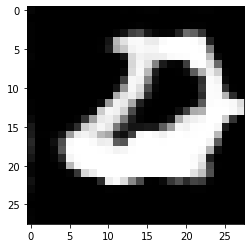

In [54]:
plt.imshow(tf.reshape(generator(np.random.randn(1,100)),(28,28)),cmap="gray")

In [56]:
generator.save("C:/Users/Sourabh/Deep Neural Network/Gans")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: C:/Users/Sourabh/Deep Neural Network/Gans\assets


INFO:tensorflow:Assets written to: C:/Users/Sourabh/Deep Neural Network/Gans\assets
